In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, f1_score, auc, roc_curve
from sklearn.metrics import classification_report
from scipy.stats import zscore
from sklearn.cluster import KMeans
from scipy.spatial import distance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [84]:
cars_df = pd.read_csv('cars-dataset.csv')

Using Qgrid to browse through the data

In [85]:
import qgrid
qgrid_widget = qgrid.show_grid(cars_df, show_toolbar=True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

Printing sample data from the dataset

In [86]:
cars_df.sample(10)

,car name,cyl,disp,hp,wt,acc,yr,mpg
339,buick skylark,4,151.0,84,2635,16.4,81,26.6
40,ford galaxie 500,8,351.0,153,4154,13.5,71,14.0
361,toyota cressida,6,168.0,116,2900,12.6,81,25.4
260,dodge aspen,6,225.0,110,3620,18.7,78,18.6
213,chevy c10,8,350.0,145,4055,12.0,76,13.0
19,volkswagen 1131 deluxe sedan,4,97.0,46,1835,20.5,70,26.0
340,dodge aries wagon (sw),4,156.0,92,2620,14.4,81,25.8
208,plymouth volare premier v8,8,318.0,150,3940,13.2,76,13.0
224,mercury cougar brougham,8,302.0,130,4295,14.9,77,15.0
344,plymouth champ,4,86.0,64,1875,16.4,81,39.0


In [87]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


Observed that hp is of datatype object, so it must contain special characters. Using the filter option in qgrid, it was identified as '?'

In [88]:
cars_df.shape

(398, 8)

In [89]:
cars_df.hp.mode()

0    150
dtype: object

Creating a dictionary with '?' as key and 150(mode) as value

In [90]:
dictionary = {'?': 150}
cars_df.replace(dictionary, inplace=True)

Converting hp datatyppe to int

In [91]:
cars_df['hp'] = cars_df['hp'].astype('str').astype('int')

In [92]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null int32
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int32(1), int64(3), object(1)
memory usage: 23.4+ KB


In [93]:
cars_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cyl,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
disp,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
hp,398.0,105.155779,38.600986,46.0,76.000,95.0,130.000,230.0
wt,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acc,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
yr,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6


Copying cars_df dataframe to another dataframe 'df'

In [94]:
df = cars_df.copy()

Checking the distribution of the data using histograms

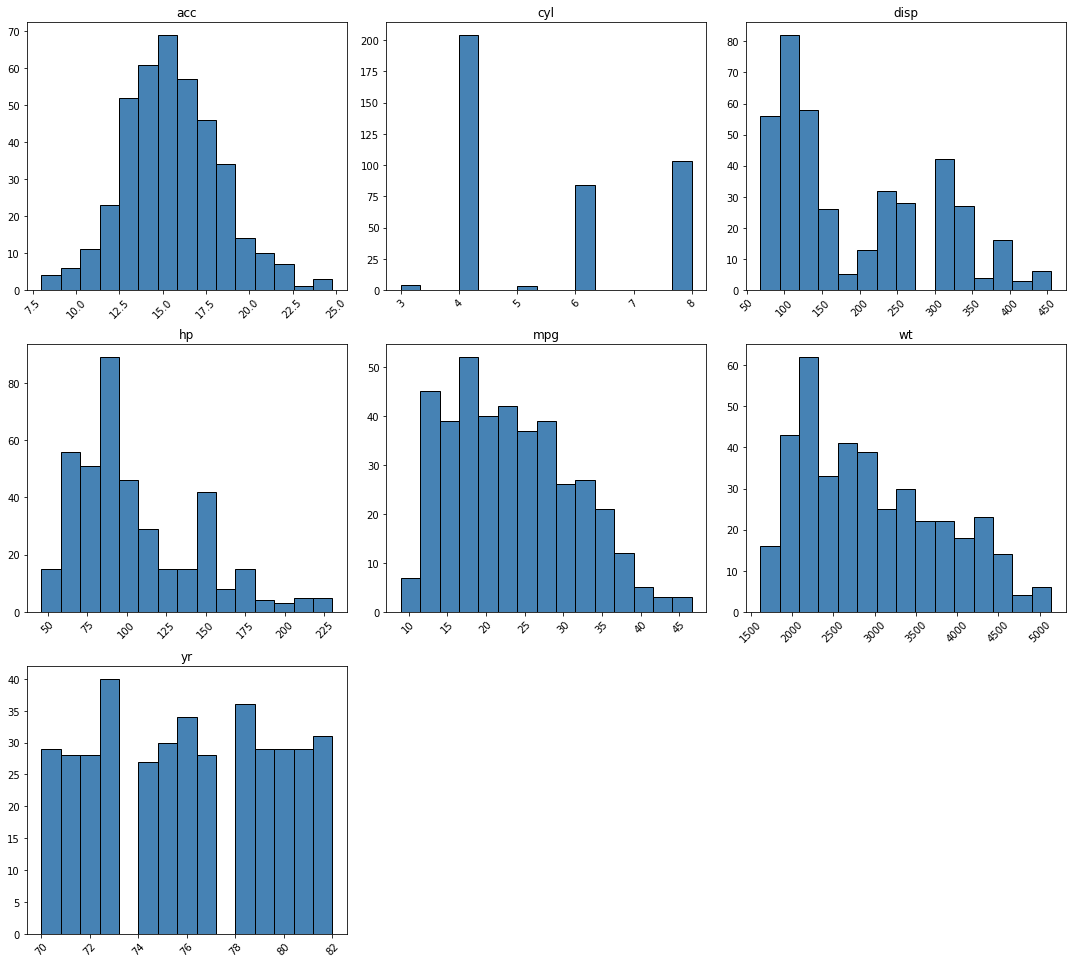

In [95]:
fig = df.hist(bins=15,
                 color='steelblue',
                 edgecolor='black', linewidth=1.0,
                 xlabelsize=10, ylabelsize=10,
                 xrot=45, yrot=0,
                 figsize=(10,9),
                 grid=False)

plt.tight_layout(rect=(0, 0, 1.5, 1.5)) 

In [96]:
corr = df.corr()
corr

,cyl,disp,hp,wt,acc,yr,mpg
cyl,1.000000,0.950721,0.818454,0.896017,-0.505419,-0.348746,-0.775396
disp,0.950721,1.000000,0.873330,0.932824,-0.543684,-0.370164,-0.804203
hp,0.818454,0.873330,1.000000,0.841770,-0.665833,-0.397772,-0.753177
wt,0.896017,0.932824,0.841770,1.000000,-0.417457,-0.306564,-0.831741
acc,-0.505419,-0.543684,-0.665833,-0.417457,1.000000,0.288137,0.420289
yr,-0.348746,-0.370164,-0.397772,-0.306564,0.288137,1.000000,0.579267
mpg,-0.775396,-0.804203,-0.753177,-0.831741,0.420289,0.579267,1.000000


Text(0.5, 0.98, 'Cars Correlation Heatmap')

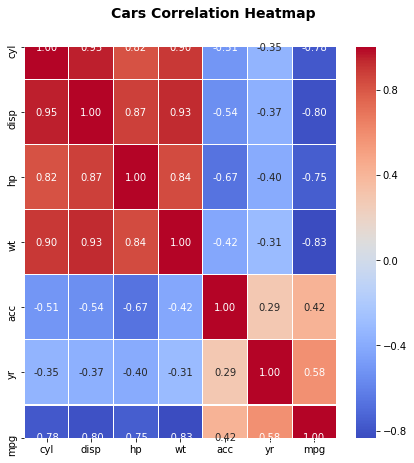

In [97]:
fig, (ax) = plt.subplots(1,1, figsize=(7,7))

hm = sns.heatmap(corr, 
                 ax=ax,           
                 cmap="coolwarm", 
                 annot=True, 
                 fmt='.2f', 
                 linewidths=.05)

fig.subplots_adjust(top=0.9)
fig.suptitle('Cars Correlation Heatmap', 
              fontsize=14, 
              fontweight='bold')

From the heatmap it looks like other than 'acceleration' and 'year', all other variables have a very strong negative correlation with the 'mpg'. This is good for model accuracy.<br> 
Also 'weight', 'hp', 'disp' and 'cyl' have a very strong positive correlation with each other. This is bad for the model accuracy. 

Text(0.5, 0.98, 'Cars Pairwise Plots')

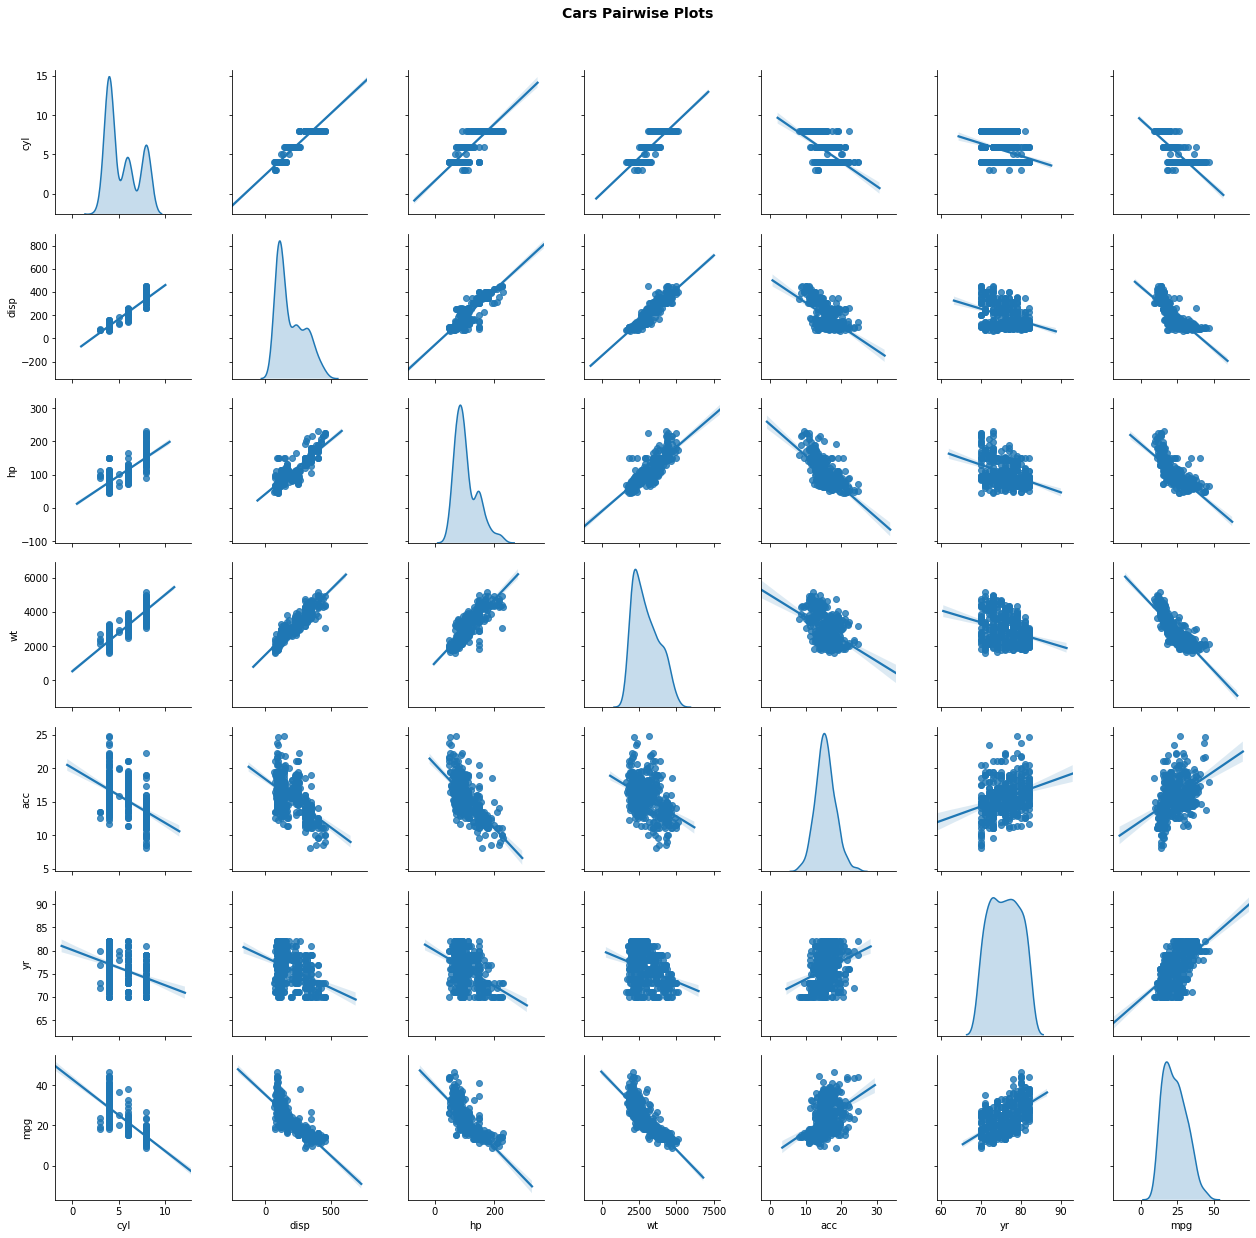

In [98]:
pp = sns.pairplot(df, 
                  diag_kws=dict(shade=True), 
                  diag_kind="kde",
                  kind="reg")

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle('Cars Pairwise Plots', fontsize=14, fontweight='bold')

The above scatter plot with a linear regression line confirms our initial hypothesis that there is a good negative correlation between all variables other than 'acc' and 'year'.<br>
The distribution of 'acc' and 'year' with respect to 'mpg' are a cloud which iis not favourable.<br>
We expect 3 clusters since there 3 well differentiated peaks for cyliner and displacement

Dropping car name and copying to a new dataframe X

In [99]:
X = df.drop('car name', axis=1)

In [100]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 7 columns):
cyl     398 non-null int64
disp    398 non-null float64
hp      398 non-null int32
wt      398 non-null int64
acc     398 non-null float64
yr      398 non-null int64
mpg     398 non-null float64
dtypes: float64(3), int32(1), int64(3)
memory usage: 20.3 KB


Applying z score and looping through 10 differnt values to find the ideal value of k for the k means model

In [101]:
X = X.apply(zscore)

In [102]:
cluster_range = range(1,10)

In [103]:
cluster_errors = []
cluster_sil_scores = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters, n_init = 5)
    clusters.fit(X)
    labels = clusters.labels_                     
    centroids = clusters.cluster_centers_         
    cluster_errors.append(clusters.inertia_) 
    

In [104]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:10]

,num_clusters,cluster_errors
0,1,2786.000000
1,2,1309.054976
2,3,961.382912
3,4,754.252064
4,5,679.279430
5,6,609.933542
6,7,560.303148
7,8,514.603775
8,9,477.688840


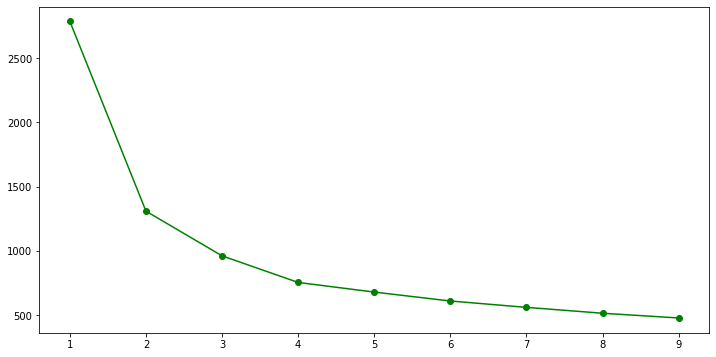

In [105]:
plt.figure(figsize=(12,6))
plt.plot(range(1,10), cluster_errors, 'go-')

We are taking optimum value of k as 3

Building another k means model now using k as 3

In [106]:
kmeans = KMeans(n_clusters=3, n_init=5)
a = kmeans.fit_transform(X)
kmeans = kmeans.fit(X)
pred = kmeans.predict(X)
centroids = kmeans.cluster_centers_

In [107]:
print(centroids)

[[ 0.33294816  0.23244729 -0.02442109  0.30199715  0.29352756  0.02490959
  -0.4698385 ]
 [-0.85344922 -0.80656011 -0.67287907 -0.79315729  0.35837031  0.29976425
   0.76157036]
 [ 1.49819126  1.50068407  1.47719449  1.40001604 -1.07612225 -0.6725559
  -1.15871315]]


Printing centeroids

In [108]:
centroid_df = pd.DataFrame(centroids, columns = list(X) )
centroid_df

,cyl,disp,hp,wt,acc,yr,mpg
0,0.332948,0.232447,-0.024421,0.301997,0.293528,0.024910,-0.469839
1,-0.853449,-0.806560,-0.672879,-0.793157,0.358370,0.299764,0.761570
2,1.498191,1.500684,1.477194,1.400016,-1.076122,-0.672556,-1.158713


In [109]:
labels = kmeans.labels_ 
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 2, 2, 2, 2, 0, 1, 1,
       1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 0, 2, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0,
       2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       2, 2, 2, 2, 2, 0, 2, 1, 1, 1, 1, 0, 0, 1, 0,

Appending the labels to the 'df' dataframe so that we can split the dataframe into 3 clusters

In [110]:
df['labels'] = labels

In [111]:
df0 = df[df['labels']==0]
df1 = df[df['labels']==1]
df2 = df[df['labels']==2]

In [112]:
pd.concat([df0.describe().T,df1.describe().T,df2.describe().T],axis=0, keys=['Car-Type: 0', 'Car-Type: 1', 'Car-Type: 2'])

count         mean         std     min       25%      50%  \
Car-Type: 0 cyl      98.0     6.020408    0.772992     4.0     6.000     6.00   
            disp     98.0   217.632653   43.890771   120.0   198.000   228.00   
            hp       98.0   104.214286   16.210122    72.0    95.000   102.50   
            wt       98.0  3225.846939  348.307228  2472.0  2936.000  3227.00   
            acc      98.0    16.376531    2.179180    11.3    15.025    16.00   
            yr       98.0    76.102041    3.167131    70.0    74.000    76.00   
            mpg      98.0    19.846939    3.056182    15.0    18.000    19.15   
            labels   98.0     0.000000    0.000000     0.0     0.000     0.00   
Car-Type: 1 cyl     205.0     4.004878    0.252392     3.0     4.000     4.00   
            disp    205.0   109.431707   24.325413    68.0    91.000   105.00   
            hp      205.0    79.214634   16.601818    46.0    68.000    78.00   
            wt      205.0  2299.590244  336.305924  1613.0  2046.000  2230.00   
            acc     205.0    16.555122    2.386920    11.6    14.800    16.20   
            yr      205.0    77.117073    3.758122    70.0    74.000    78.00   
            mpg     205.0    29.459512    5.674726    18.0    25.000    29.00   
            labels  205.0     1.000000    0.000000     1.0     1.000     1.00   
Car-Type: 2 cyl      95.0     8.000000    0.000000     8.0     8.000     8.00   
            disp     95.0   349.705263   44.336449   302.0   312.500   350.00   
            hp       95.0   162.105263   26.028002   120.0   145.000   150.00   
            wt       95.0  4154.526316  437.810968  3086.0  3860.000  4190.00   
            acc      95.0    12.604211    1.780265     8.0    11.500    12.80   
            yr       95.0    73.526316    2.797575    70.0    71.000    73.00   
            mpg      95.0    14.469474    2.167265     9.0    13.000    14.00   
            labels   95.0     2.000000    0.000000     2.0     2.000     2.00   

                         75%     max  
Car-Type: 0 cyl        6.000     8.0  
            disp     250.000   350.0  
            hp       110.000   165.0  
            wt      3443.500  4060.0  
            acc       17.675    22.2  
            yr        78.000    82.0  
            mpg       21.000    32.7  
            labels     0.000     0.0  
Car-Type: 1 cyl        4.000     6.0  
            disp     121.000   262.0  
            hp        90.000   150.0  
            wt      2556.000  3250.0  
            acc       18.000    24.8  
            yr        80.000    82.0  
            mpg       33.000    46.6  
            labels     1.000     1.0  
Car-Type: 2 cyl        8.000     8.0  
            disp     383.000   455.0  
            hp       175.000   230.0  
            wt      4432.500  5140.0  
            acc       13.700    18.5  
            yr        76.000    79.0  
            mpg       16.000    20.2  
            labels     2.000     2.0

Using basic inference on the above data we can conclude that :<br>
<ul>
        <li>Car Type 0 contains saloon version of cars with a high displacement, power, acceleration and milage while being heavy.</li>
        <li>Car Type 1 contains the hatchback/lighter cars with a very good milage and acceleration but lower engine displacement and power.</li>
        <li>Car Type 2 contains the heaviest vehicles, probably SUVs with poor milage and acceleration but has the highest displacement and power</li>
        
</ul>


<strong>Linear Regression for Sedan variant</strong>

In [113]:
X = df0.drop(['car name','labels'], axis =1)
X=X.apply(zscore)

In [114]:
y=X['mpg']
X=X.drop('mpg', axis=1)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [116]:
sedan_model = LinearRegression()
sedan_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

printing the coefficients

In [117]:
pd.DataFrame({'Columns': X_train.columns, 'Coeff' : sedan_model.coef_})

,Columns,Coeff
0,cyl,0.228175
1,disp,-0.065822
2,hp,-0.047224
3,wt,-0.523445
4,acc,-0.066730
5,yr,0.586694


Printing the train and test accuracy. We expect poor accuracy since the data sample is less for sedan type

In [118]:
sedan_model.score(X_train,y_train)

0.5014293585611542

In [119]:
sedan_model.score(X_test,y_test)

0.20187622418386666

<strong>Linear Regression for hatchback variant</strong>

In [120]:
X = df1.drop(['car name','labels'], axis =1)
X=X.apply(zscore)


In [121]:
y= X['mpg']
X=X.drop('mpg', axis=1)

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [123]:
Hatchback_model = LinearRegression()
Hatchback_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Printing coefficients for hatchback model

In [124]:
pd.DataFrame({'Columns': X_train.columns, 'Coeff' : Hatchback_model.coef_})

,Columns,Coeff
0,cyl,0.254945
1,disp,-0.187648
2,hp,-0.018923
3,wt,-0.414274
4,acc,0.116168
5,yr,0.623259


Printing accuracy of train and test. We expect better performance since the dataset is larger

In [125]:
Hatchback_model.score(X_train,y_train)

0.6736454354168835

In [126]:
Hatchback_model.score(X_test,y_test)

0.7139126275800807

<strong>Linear Regression for SUV variant</strong>

In [131]:
X = df2.drop(['car name', 'labels','mpg'], axis =1)

y= df2['mpg']


In [132]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

In [133]:
SUV_model = LinearRegression()
SUV_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [134]:
pd.DataFrame({'Columns': X_train.columns, 'Coeff' : SUV_model.coef_})

,Columns,Coeff
0,cyl,0.000000
1,disp,-0.001067
2,hp,-0.017833
3,wt,-0.002110
4,acc,-0.414125
5,yr,0.357688


Printing accuracy of train and test. We expect poor performance since the dataset is small

In [135]:
SUV_model.score(X_train,y_train)

0.5936342669869497

In [136]:
SUV_model.score(X_test,y_test)

0.361697021701365

Checking if clusters vary when using Hierarchical clustering

In [138]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

In [141]:
X = df.drop('car name', axis=1)

In [142]:
X = X.apply(zscore)

In [143]:
Z = linkage(X, 'ward')

In [144]:
c, coph_dists = cophenet(Z , pdist(X))

In [145]:
c

0.8552950735780984

Limiting p =12

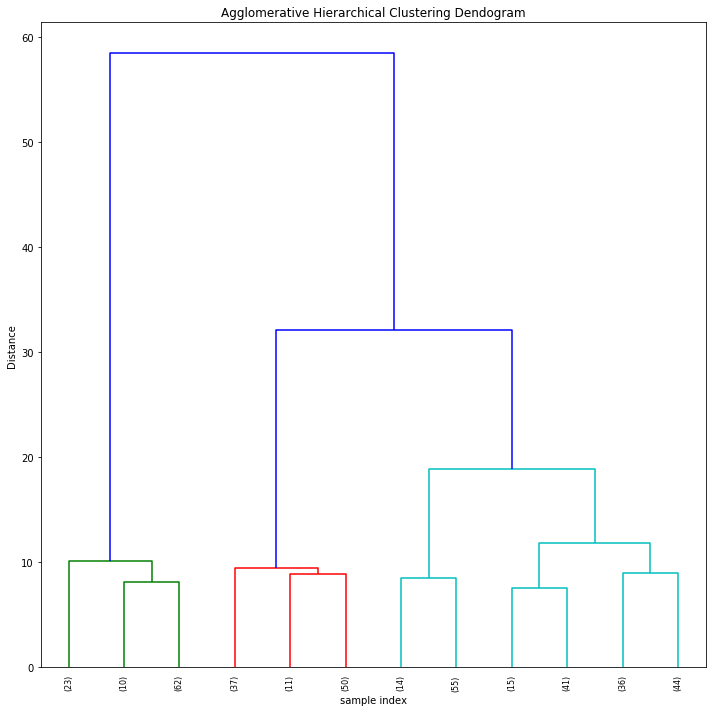

In [146]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z,p=12, leaf_rotation=90,color_threshold = 30, leaf_font_size=8, truncate_mode='lastp' )
plt.tight_layout()

Taking max distance as 20 so that we get 3 clusters

In [147]:
from scipy.cluster.hierarchy import fcluster
max_d=20
clusters = fcluster(Z, max_d, criterion='distance')

In [148]:
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 2, 1, 1, 1, 1, 3, 3, 3, 3, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 2, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 3, 3, 3, 2, 1, 3, 2, 1, 2, 2, 2, 2, 3, 3, 3,
       3, 2, 2, 2, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2,
       2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1, 3, 3, 2, 3, 3, 3, 3, 2, 3,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3,
       3, 2, 2, 2, 2, 3, 3, 3, 3, 2, 1, 2, 2, 2, 1, 1, 1, 1, 3, 3, 3, 3,
       3, 1, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       3, 3, 3, 3, 3, 3, 3, 2, 1, 1, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2,
       1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 2, 2,
       1, 1, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 2, 3, 2,

In [149]:
df['labels'] = clusters

In [151]:
df0 = df[df['labels']==1]
df1 = df[df['labels']==2]
df2 = df[df['labels']==3]

In [152]:
pd.concat([df0.describe().T,df1.describe().T,df2.describe().T],axis=0, keys=['Car-Type: 0', 'Car-Type: 1', 'Car-Type: 2'])

count         mean         std     min       25%      50%  \
Car-Type: 0 cyl      95.0     8.000000    0.000000     8.0     8.000     8.00   
            disp     95.0   349.705263   44.336449   302.0   312.500   350.00   
            hp       95.0   162.105263   26.028002   120.0   145.000   150.00   
            wt       95.0  4154.526316  437.810968  3086.0  3860.000  4190.00   
            acc      95.0    12.604211    1.780265     8.0    11.500    12.80   
            yr       95.0    73.526316    2.797575    70.0    71.000    73.00   
            mpg      95.0    14.469474    2.167265     9.0    13.000    14.00   
            labels   95.0     1.000000    0.000000     1.0     1.000     1.00   
Car-Type: 1 cyl      98.0     6.020408    0.772992     4.0     6.000     6.00   
            disp     98.0   217.632653   43.890771   120.0   198.000   228.00   
            hp       98.0   104.214286   16.210122    72.0    95.000   102.50   
            wt       98.0  3225.846939  348.307228  2472.0  2936.000  3227.00   
            acc      98.0    16.376531    2.179180    11.3    15.025    16.00   
            yr       98.0    76.102041    3.167131    70.0    74.000    76.00   
            mpg      98.0    19.846939    3.056182    15.0    18.000    19.15   
            labels   98.0     2.000000    0.000000     2.0     2.000     2.00   
Car-Type: 2 cyl     205.0     4.004878    0.252392     3.0     4.000     4.00   
            disp    205.0   109.431707   24.325413    68.0    91.000   105.00   
            hp      205.0    79.214634   16.601818    46.0    68.000    78.00   
            wt      205.0  2299.590244  336.305924  1613.0  2046.000  2230.00   
            acc     205.0    16.555122    2.386920    11.6    14.800    16.20   
            yr      205.0    77.117073    3.758122    70.0    74.000    78.00   
            mpg     205.0    29.459512    5.674726    18.0    25.000    29.00   
            labels  205.0     3.000000    0.000000     3.0     3.000     3.00   

                         75%     max  
Car-Type: 0 cyl        8.000     8.0  
            disp     383.000   455.0  
            hp       175.000   230.0  
            wt      4432.500  5140.0  
            acc       13.700    18.5  
            yr        76.000    79.0  
            mpg       16.000    20.2  
            labels     1.000     1.0  
Car-Type: 1 cyl        6.000     8.0  
            disp     250.000   350.0  
            hp       110.000   165.0  
            wt      3443.500  4060.0  
            acc       17.675    22.2  
            yr        78.000    82.0  
            mpg       21.000    32.7  
            labels     2.000     2.0  
Car-Type: 2 cyl        4.000     6.0  
            disp     121.000   262.0  
            hp        90.000   150.0  
            wt      2556.000  3250.0  
            acc       18.000    24.8  
            yr        80.000    82.0  
            mpg       33.000    46.6  
            labels     3.000     3.0

Using basic inference on the above data we can conclude that :<br>
<ul>
        <li>Car Type 0 contains the heaviest vehicles, probably SUVs with poor milage and acceleration but has the highest displacement and power</li>
    <li>Car Type 1 contains sedan version of cars with a high displacement, power acceleration and milage while being heavy.</li>
    <li>Car Type 2 contains the hatchback/lighter cars with a very good milage and acceleration but lower engine displacement and power.</li>
    
</ul>

The number of samples returned in each cluster is similar to k means